In [1]:
import matplotlib.pyplot as plt
import numpy as np
from modelInferencer import ModelInferencer
from skimage import io

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
p = '/home/ubuntu/project/'
data_path = p + "data/groundcover2016/test/"
model_path = p + "model_checkpoints/unet/"
m = ModelInferencer(model_path + "unet_multiclass.hdf5",data_path = data_path)

In [5]:
def plotImageSet(path,imageName,col,whichClass,axes):
    img = io.imread(path + '/data/' + imageName)
    label = io.imread(path + '/label/' + imageName)
    # invert label
    
    label[label > 1] = 2
    label[label < 1] = 100
    label[label == 2] = 0

    pred = m.predict(img)
    print(np.shape(pred))
    axes[0,col].imshow(img)
    axes[0,0].set_ylabel("Image", fontsize = 25)
    axes[0,col].set_yticks([])
    axes[0,col].set_xticks([])
    axes[1,col].imshow(label)
    axes[1,0].set_ylabel("Label", fontsize = 25)
    axes[1,col].set_yticks([])
    axes[1,col].set_xticks([])
    axes[2,0].set_ylabel("Ground Prediction", fontsize = 25)
    axes[2,col].imshow(pred[:,:,0])
    axes[2,col].set_yticks([])
    axes[2,col].set_xticks([])
    axes[3,0].set_ylabel("Maize Prediction", fontsize = 25)
    axes[3,col].imshow(pred[:,:,1])
    axes[3,col].set_yticks([])
    axes[3,col].set_xticks([])
    axes[4,0].set_ylabel("Mungbean Prediction", fontsize = 25)
    axes[4,col].imshow(pred[:,:,3])
    axes[4,col].set_yticks([])
    axes[4,col].set_xticks([])
    axes[5,0].set_ylabel("Wheat Prediction", fontsize = 25)
    axes[5,col].imshow(pred[:,:,2])
    axes[5,col].set_yticks([])
    axes[5,col].set_xticks([])

(1152, 2048, 4)
(1536, 2048, 4)
(1152, 2048, 4)


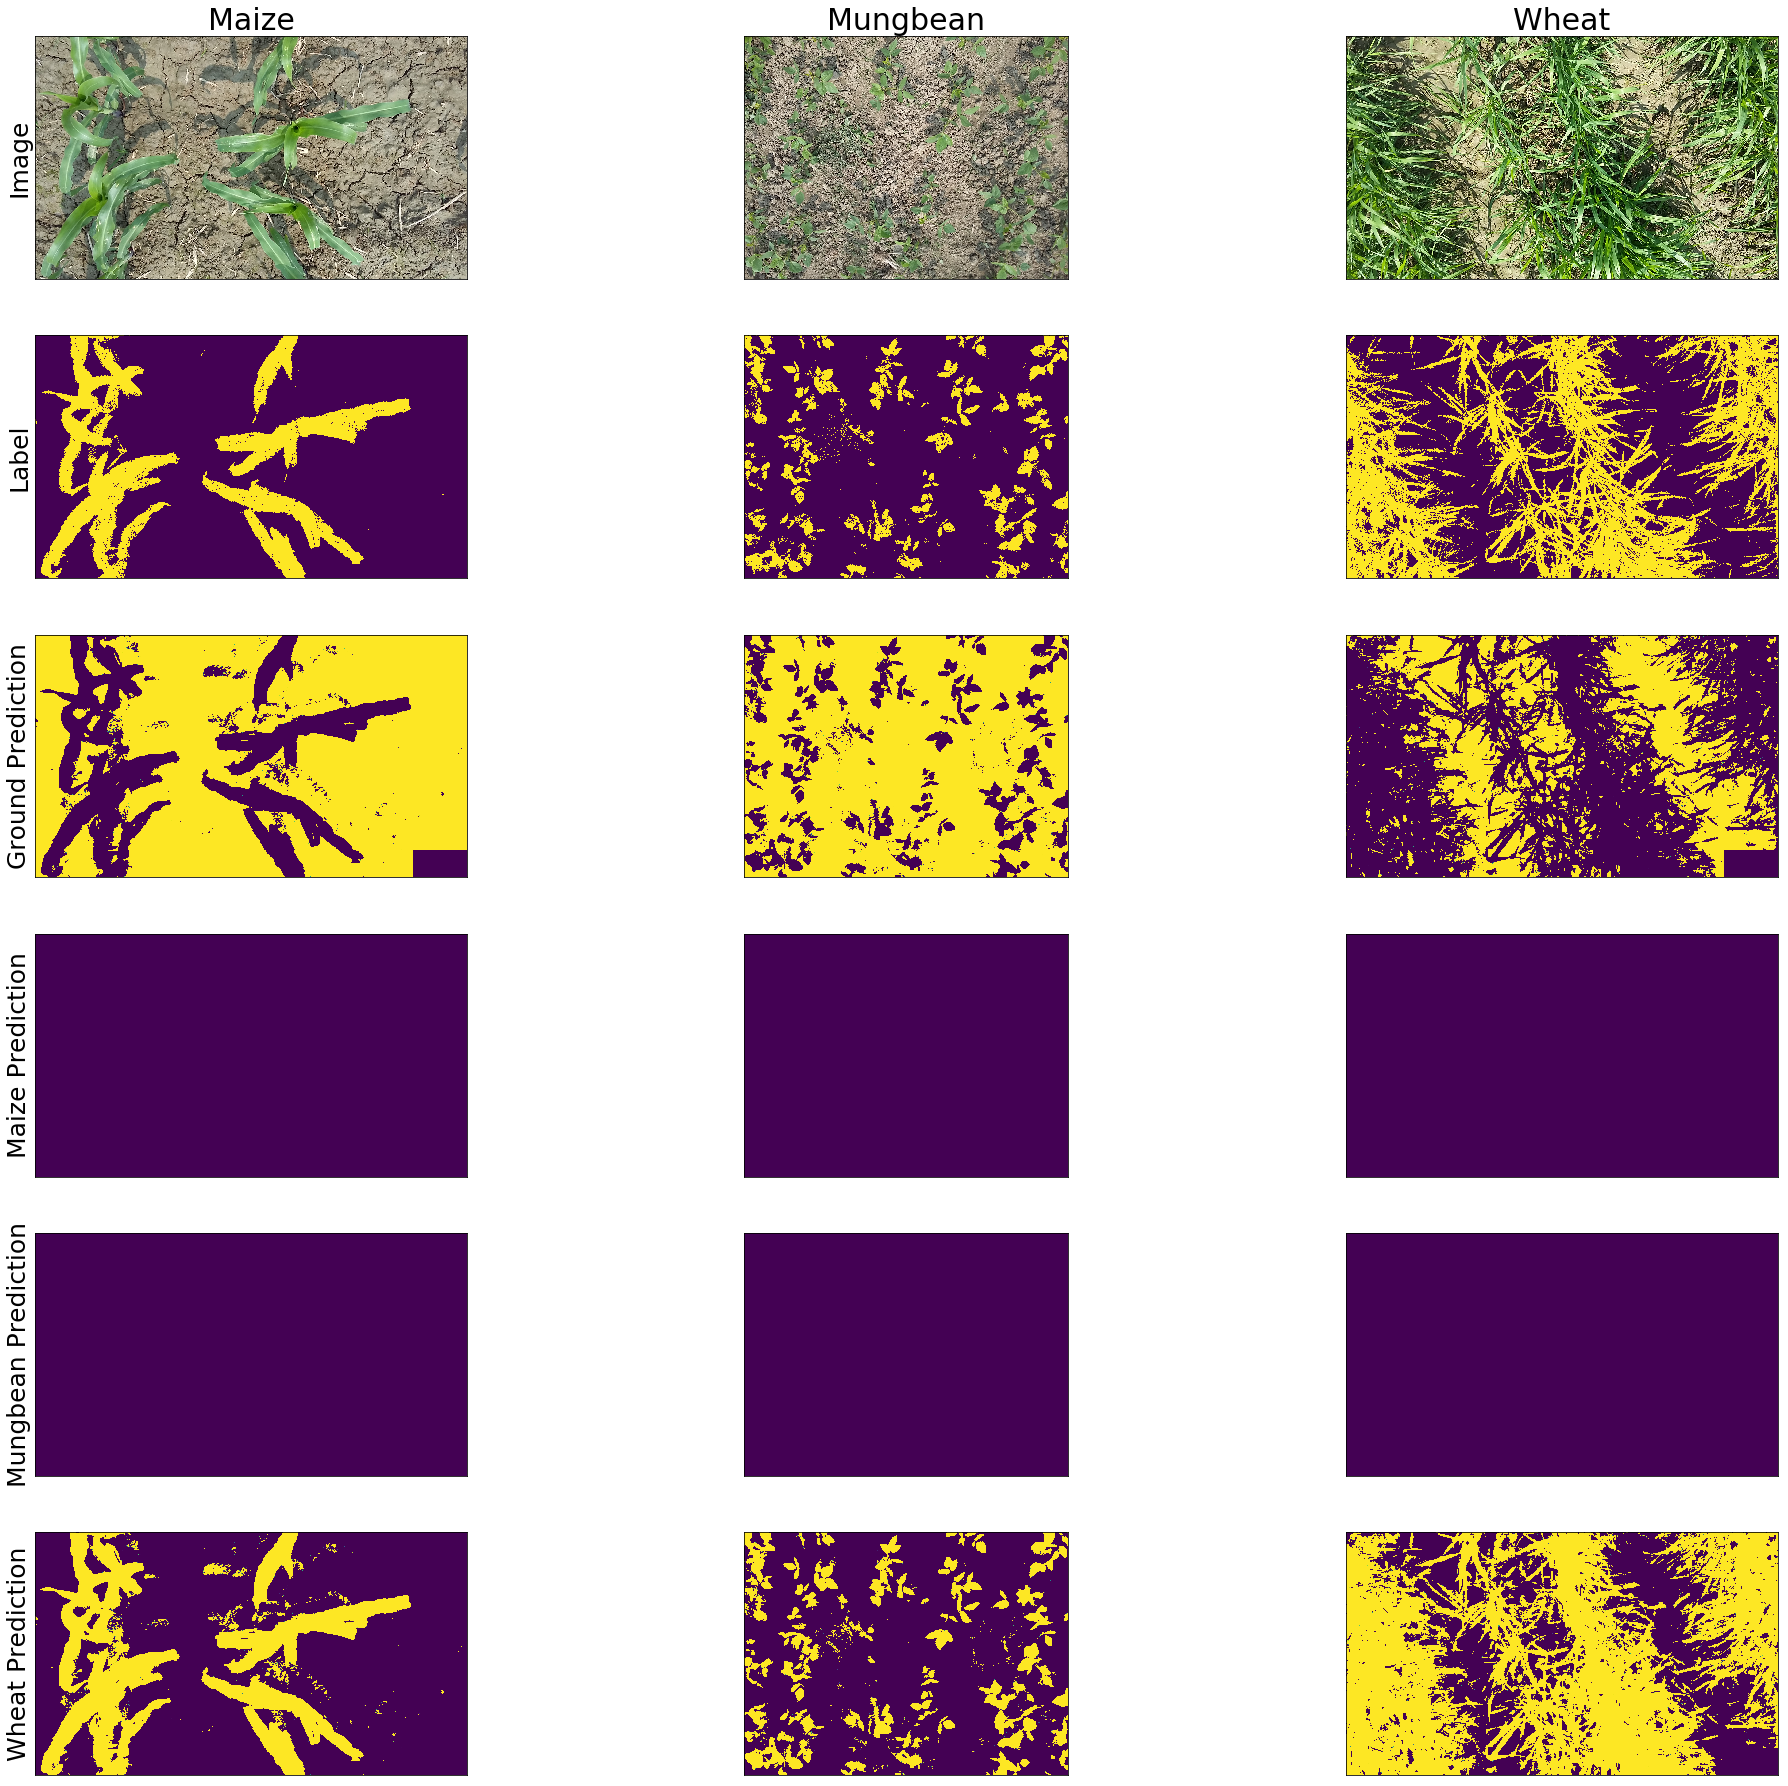

In [7]:
fig, axes = plt.subplots(nrows=6, 
                        ncols=3,
                        figsize=(30, 25))
# set titles
axes[0,0].set_title("Maize",fontsize = 30)
axes[0,1].set_title("Mungbean",fontsize = 30)
axes[0,2].set_title("Wheat",fontsize = 30)

plotImageSet(data_path + "maize","20160215_114109.jpg",0 ,2,axes)
plotImageSet(data_path + "mungbean","20150816_112843.jpg",1 ,2,axes)
plotImageSet(data_path + "wheat","20160125_123742.jpg",2 ,2,axes)
plt.tight_layout()
plt.savefig("testResults.png")
plt.show()